# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [622]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()
cancer = df

(569, 33)


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [623]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [624]:
df.shape

(569, 32)

In [625]:
#check for null/nan values or the KMeans will not run
df.isnull().sum()

id                           0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [626]:
#remove nan
df = df.drop(['Unnamed: 32','id'], axis=1)
df.shape

(569, 30)

## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


In [628]:
corr_matrix = df.corr()
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [0]:
#create a loop tha will print the highest correlation pairs 
#except the ones that are equal to 1
#for col in corr_matrix:
#  if corr_matrix[corr_matrix[col] == 1]:
#    continue
#  elif corr_matrix[corr_matrix[col] > 0.95]:
#    print(hi)

In [0]:
#select features
features = ['smoothness_mean', 'texture_mean']


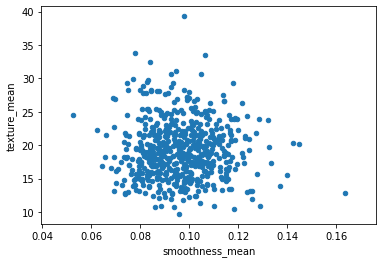

In [631]:
#plot them
df[features].plot(kind='scatter', x=features[0], y=features[1]);

In [0]:
#initialize an instance of the kMeans class form sklearn
k=2
model = KMeans(n_clusters=k, max_iter=1)

In [633]:
#fit the instantiated model to our sliced dataframe
model.fit(df[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#assign cluster back to our dataframe:
df['clusters'] = model.labels_

In [0]:
#get our centeroids
centeroids = model.cluster_centers_

In [636]:
#turn them into a dataframe
cc = pd.DataFrame(centeroids)
cc.head()

,0,1
0,0.095767,16.447619
1,0.097215,23.388026


In [0]:
#setup colors for plotting
base_colors = ['r', 'g']
colors = [base_colors[centeroids] for centeroids in model.labels_]

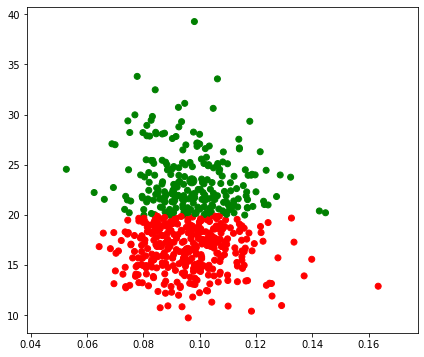

In [638]:
#plot the scatter of our points with calculated centeroids
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df[features[0]], df[features[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

In [639]:

# what's our silhouette score?
metrics.silhouette_score(df, model.labels_, metric='euclidean')

0.15626666204375034

#elbow

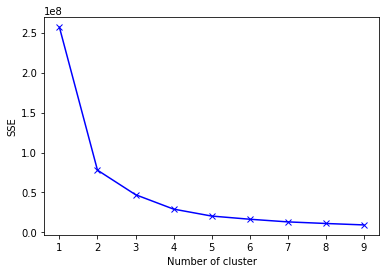

In [640]:
#applying the elbow method
#https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

#sum of squared erros/distances SSE
#sse = []
sse = {}
for k in range(1,10):
  #print(df)
  kmeans = KMeans(n_clusters=k).fit(df)
  df['clusters'] = kmeans.labels_ #labels of each point
  #print(df['clusters'])
  #alternatively
  #sse.append(km.inertia_)
  sse[k] = kmeans.inertia_ #Inertia: Sum of square distances of samples to their closest cluster center

#plot the elbow results
plt.figure()
#alternatively
#plt.plot(k, sse)
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel('Number of cluster')
plt.ylabel('SSE')
plt.show()


#the elbow is 2

In [641]:
#Using the silhouette coefficient
from sklearn.metrics import silhouette_score

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(df, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.6972529242146116
For n_clusters=3, The Silhouette Coefficient is 0.6660062395881179
For n_clusters=4, The Silhouette Coefficient is 0.533452256456511
For n_clusters=5, The Silhouette Coefficient is 0.510199838106013
For n_clusters=6, The Silhouette Coefficient is 0.48605973087275184
For n_clusters=7, The Silhouette Coefficient is 0.4669566020786674
For n_clusters=8, The Silhouette Coefficient is 0.46584771276052966
For n_clusters=9, The Silhouette Coefficient is 0.4724468518548233
For n_clusters=10, The Silhouette Coefficient is 0.4500192320506265


###A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. in this case n_cluster=4 has the hieghest, but here is the catch, our results are anticipating 2 types of cancer results, Malignant and its opposite benign, so therefore we will consider n_cluster=2 as the optimal number.

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [642]:
# Your Code Here
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
df_coded = cancer.replace({'M':1, 'B':0})

In [0]:
def check(data, col):
  num_correct_labels = data[col].sum()
  num_total_obs = len(data[col])
  return num_correct_labels/num_total_obs

In [645]:
check(df_coded, 'diagnosis')

0.37258347978910367

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



####Principal Components are a linear combination of any and all dimensions (features) that will increase their variance, this means that PCs are made up of a mixture of features --mostly the ones with the highest variance, but also smaller parts from other features

####Note that PCA does not actually increase the variance of your data. Rather, it rotates the data set in such a way as to align the directions in which it is spread out the most with the principal axes. This enables you to remove those dimensions along which the data is almost flat. This decreases the dimensionality of the data while keeping the variance (or spread) among the points as close to the original as possible.

#Resources
[https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c](https://)

#Manual PCA

In [646]:
#first standarize the data
from sklearn.preprocessing import StandardScaler

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,6
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,6
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,4
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,6


In [647]:
#check for null values
df.isnull().sum().any()

False

In [648]:
df.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [649]:
#Let's do a manual calculation to reinforce the behind the hoood of PCA
#check for number of categorical and numeric columns
cat_cols = df.columns[df.dtypes=='object'] & df.columns[df.dtypes=="string"]
num_cols = df.columns[df.dtypes != 'object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')


0 categorical columns
31 numerical columns


In [0]:
# there are no categorical cols so there is no need to cast them to a "category" data type
# this is how you would do it:
#df[cat_cols] = df[cat_cols].astype('category')
#df.dtypes


In [0]:
#Then replace cat cells with numeric values
#for col in cat_cols:
#  df[col] = df[col].cat.codes

#df.head()
#df.dtypes

In [651]:
#now lets get the means manually and find the difference to each point
means = np.mean(df)
centered = df - means
centered.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,3.862708,-8.909649,30.830967,346.110896,0.02204,0.173259,0.211301,0.098181,0.060738,0.015912,0.689828,-0.311553,5.722941,113.062921,-0.000642,0.023562,0.021836,0.004074,0.009488,0.002398,9.11081,-8.347223,77.338787,1138.416872,0.029831,0.411335,0.439712,0.150794,0.170024,0.034954,2.87522
1,6.442708,-1.519649,40.930967,671.110896,-0.01162,-0.025701,-0.001899,0.021251,0.000038,-0.006128,0.138328,-0.482953,0.531941,33.742921,-0.001816,-0.012398,-0.013294,0.001604,-0.006652,-0.000263,8.72081,-2.267223,51.538787,1075.416872,-0.008569,-0.067665,-0.030588,0.071394,-0.015076,0.005074,-2.12478
2,5.562708,1.960351,38.030967,548.110896,0.01324,0.055559,0.108601,0.078981,0.025738,-0.002808,0.340428,-0.429953,1.718941,53.692921,-0.000891,0.014582,0.006426,0.008784,0.001958,0.000776,7.30081,-0.147223,45.238787,828.416872,0.012031,0.170235,0.178212,0.128394,0.071224,0.003634,2.87522
3,-2.707292,1.090351,-14.389033,-268.789104,0.04614,0.179559,0.152601,0.056281,0.078538,0.034642,0.090428,-0.060853,0.578941,-13.107079,0.002069,0.049102,0.024716,0.006874,0.039088,0.005413,-1.35919,0.822777,-8.391213,-312.883128,0.077431,0.612035,0.414712,0.142894,0.373724,0.089054,0.87522
4,6.162708,-4.949649,43.130967,642.110896,0.00394,0.028459,0.109201,0.055381,-0.000262,-0.003968,0.352028,-0.435553,2.571941,54.102921,0.004449,-0.000868,0.024986,0.007054,-0.002982,0.001320,6.27081,-9.007223,44.938787,694.416872,0.005031,-0.049265,0.127812,0.047894,-0.053676,-0.007166,2.87522


In [652]:
#check that the means of each column will be zero
check_means= np.mean(centered)
check_means.head()

radius_mean       -1.106087e-14
texture_mean      -2.848415e-14
perimeter_mean    -1.723285e-14
area_mean         -3.178836e-13
smoothness_mean    8.602277e-17
dtype: float64

In [653]:
stdev = np.std(centered)
standarized = centered/stdev
standarized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.304981
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,-0.964378
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.304981
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0.397238
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.304981


In [654]:
#check the standard deviation and it should be 1
check_stdev = np.std(standarized)
check_stdev

radius_mean                1.0
texture_mean               1.0
perimeter_mean             1.0
area_mean                  1.0
smoothness_mean            1.0
compactness_mean           1.0
concavity_mean             1.0
concave points_mean        1.0
symmetry_mean              1.0
fractal_dimension_mean     1.0
radius_se                  1.0
texture_se                 1.0
perimeter_se               1.0
area_se                    1.0
smoothness_se              1.0
compactness_se             1.0
concavity_se               1.0
concave points_se          1.0
symmetry_se                1.0
fractal_dimension_se       1.0
radius_worst               1.0
texture_worst              1.0
perimeter_worst            1.0
area_worst                 1.0
smoothness_worst           1.0
compactness_worst          1.0
concavity_worst            1.0
concave points_worst       1.0
symmetry_worst             1.0
fractal_dimension_worst    1.0
clusters                   1.0
dtype: float64

In [0]:
# the centered and standarized matrix is called Matrix Z

In [656]:
#Covariance is a measure of how changes in one variable are associated with changes in a second variable. 
#It's a measure of how they Co (together) Vary (move) or how they move in relation
#to each other

#covariance = Z.T*Z

Z = standarized

covarianse = Z.cov()
covarianse.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
radius_mean,1.001761,0.324352,0.999612,0.989095,0.170882,0.507015,0.677955,0.823977,0.148001,-0.312179,0.680286,-0.097489,0.675359,0.737159,-0.222992,0.206363,0.194546,0.376831,-0.104505,-0.042716,0.971246,0.297531,0.966836,0.942739,0.119827,0.414191,0.527839,0.745524,0.164242,0.007078,0.269176
texture_mean,0.324352,1.001761,0.330113,0.321651,-0.023430,0.237119,0.302950,0.293981,0.071527,-0.076572,0.276354,0.387038,0.282169,0.260302,0.006625,0.192313,0.143545,0.164139,0.009143,0.054553,0.353194,0.913650,0.358670,0.344151,0.077640,0.278319,0.301555,0.295836,0.105193,0.119415,0.111524
perimeter_mean,0.999612,0.330113,1.001761,0.988244,0.207643,0.557917,0.717396,0.852475,0.183349,-0.261937,0.692983,-0.086914,0.694355,0.746294,-0.203051,0.251185,0.228484,0.407934,-0.081773,-0.005533,0.971183,0.303572,0.972095,0.943207,0.150814,0.456577,0.564872,0.772599,0.189448,0.051108,0.270407
area_mean,0.989095,0.321651,0.988244,1.001761,0.177340,0.499379,0.687191,0.824718,0.151559,-0.283608,0.733852,-0.066397,0.727908,0.801495,-0.167070,0.212957,0.208026,0.372976,-0.072624,-0.019922,0.964441,0.287995,0.960808,0.960902,0.123740,0.391098,0.513508,0.723288,0.143823,0.003744,0.267485
smoothness_mean,0.170882,-0.023430,0.207643,0.177340,1.001761,0.660284,0.522903,0.554670,0.558757,0.585822,0.301998,0.068527,0.296613,0.246987,0.332961,0.319505,0.248833,0.381346,0.201128,0.284106,0.213495,0.036135,0.239273,0.207082,0.806742,0.473300,0.435691,0.503939,0.395004,0.500195,0.090935


In [657]:
#calculate eigenvectors and their corresponding eigenvalues of the covariance
evalues, evectors = np.linalg.eig(covarianse)
evectors

array([[ 2.18954350e-01, -2.31982349e-01,  7.82299520e-03,
        -4.12771532e-02,  4.07951546e-02, -1.63923016e-02,
        -7.76945176e-03,  1.27525093e-01, -3.62120632e-03,
        -2.22121428e-01,  9.59186428e-02, -4.09810526e-02,
        -5.12574393e-02,  1.14141302e-02, -5.97605988e-02,
         5.10138458e-02,  1.50180598e-01,  2.01580359e-01,
        -1.46880749e-01, -2.26618132e-01,  7.02421905e-01,
        -2.10900917e-01,  2.10963396e-01,  1.33177929e-01,
         1.29579074e-01,  2.52116425e-02,  1.81611983e-01,
        -9.96694194e-02,  7.15779158e-02,  4.97859701e-02,
         6.98459046e-02],
       [ 1.03601689e-01, -5.88755342e-02, -6.47699596e-02,
         6.03036717e-01, -4.83992275e-02,  3.39457099e-02,
        -1.59001842e-03, -1.38984863e-02, -1.31965469e-01,
         1.16796875e-01,  2.38574428e-01,  3.03097307e-01,
        -2.55966766e-01,  2.00972550e-01,  2.23365326e-02,
         1.07982032e-01,  1.58218804e-01, -3.76283359e-02,
         4.11342954e-02, -3.21

In [658]:
#decompose ZTZ into PDP_inverse
P = evectors.T.dot(Z.T)
P
#the answer below does not like the covariance matrix 

array([[ 9.25956535,  2.32018471,  5.81786688, ...,  1.38612277,
        10.43852191, -5.4960239 ],
       [ 1.93171717, -3.68939167, -1.11007093, ..., -1.9887139 ,
         1.66496283, -0.67808461],
       [ 1.13658502,  0.50224253,  0.56445419, ..., -0.54033505,
         1.88620585, -1.49109307],
       ...,
       [ 0.07223712, -0.10281036, -0.05395053, ...,  0.06785872,
        -0.03663178, -0.2424458 ],
       [-0.34520955,  0.11244516,  0.20414098, ...,  0.08357777,
        -0.17263175, -0.16503224],
       [-0.09831095,  0.08609703, -0.31860177, ...,  0.02815014,
        -0.1461882 , -0.27366991]])

In [0]:
#let's do a reduced version 
reduced = df[['radius_mean', 'area_mean']]

In [660]:
#do the entire proces above again
means = np.mean(reduced)
centered = reduced-means
stdev = np.std(centered)
standarized = centered/stdev
standarized.head()

,radius_mean,area_mean
0,1.097064,0.984375
1,1.829821,1.908708
2,1.579888,1.558884
3,-0.768909,-0.764464
4,1.750297,1.826229


In [661]:
Z_reduced = standarized
covarianse = Z_reduced.cov()
evalues, evectors = np.linalg.eig(covarianse)
evectors

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [662]:
P = evectors.T.dot(Z_reduced.T)
P

array([[-0.07968321,  0.05578199, -0.01485241, ..., -0.08791572,
        -0.072919  ,  0.32570187],
       [-1.47179955, -2.64353911, -2.21944679, ..., -0.90526419,
        -2.52688782,  2.23176369]])

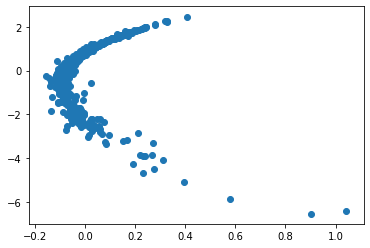

In [663]:
plt.scatter(*P)

#Big Gun PCA

In [0]:
#now let's use the big guns for PCA and KMean and compare with the manual
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [665]:
#not standarized datafrane
df.head(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,clusters
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,6
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,6


In [0]:
#standarize
scl = StandardScaler()
Z = scl.fit_transform(df)

In [681]:
#apply PCA to the data
pca = PCA(n_components=2)
pca.fit(df)
B = pca.transform(Z)
B #pca_feautures

array([[-1097.34259865,  -106.02794571],
       [-1097.07965624,  -105.18312261],
       [-1097.61573487,  -105.26724945],
       ...,
       [-1099.12938718,  -105.66168749],
       [-1097.28671428,  -105.22820393],
       [-1101.66319885,  -106.69407087]])

In [668]:
#  how much variation did each principal component explain?
pca.explained_variance_ratio_

array([0.98203487, 0.01617632])

In [669]:
# How much total variance did we explain?
sum(pca.explained_variance_ratio_)

0.9982111956462829

In [678]:
#turn into a datafram

# Turn that into a dataframe.
df_pca=pd.DataFrame(B, columns=['comp_1', 'comp_2'])
df_pca.head()

,comp_1,comp_2
0,-1097.342599,-106.027946
1,-1097.079656,-105.183123
2,-1097.615735,-105.267249
3,-1100.789037,-106.375164
4,-1097.678876,-104.877271


###now apply clustering

In [670]:
# Initialize an instance of the KMeans class from sklearn.
k = 2
kmeans = KMeans(n_clusters=k, max_iter=1)
kmeans.fit(B)
pca_labels = kmeans.labels_
pca_labels

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

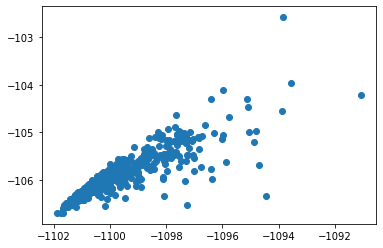

In [671]:
plt.scatter(B[:,0], B[:,1])

#Make a Scree plot

In [0]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
   it takes pca  as input - the result of instantian of PCA in scikit learn
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals, c='r')
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

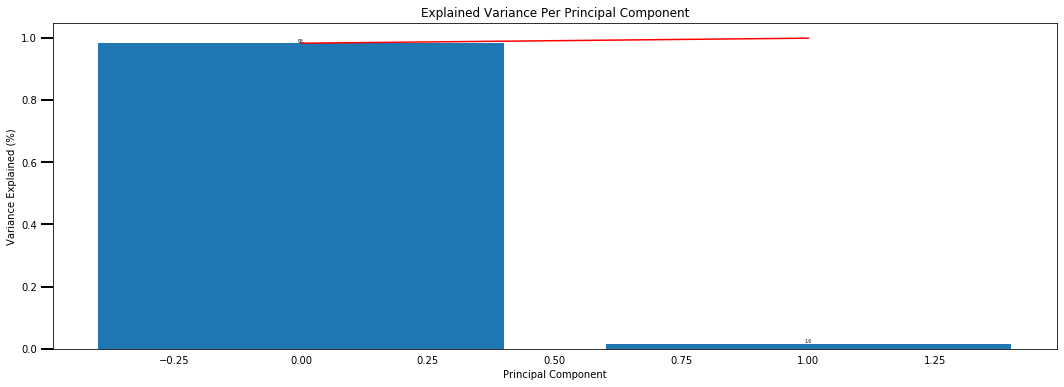

In [673]:
scree_plot(pca)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [0]:
num_correct_labels = df_coded['diagnosis'].sum()
num_total_obser = len(df_coded['diagnosis'])

In [675]:
num_correct_labels/num_total_obser

0.37258347978910367

In [676]:
#KMeans
num_correct_labels = pca_labels.sum()
num_total_obser = len(pca_labels)

num_correct_labels / num_total_obser

0.2126537785588752

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project